In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [2]:
#fundamental libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Keras libraries
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

import itertools
import warnings

warnings.filterwarnings('ignore')
print("##################################")
print("Importing all required libraries")
print("##################################")

##################################
Importing all required libraries
##################################


In [3]:
print("#####################################")
print("loading data from drive successfully")
print("####################################")
df_diesel_price = pd.read_csv('/content/drive/MyDrive/diesel_price.csv')

#####################################
loading data from drive successfully
####################################


In [4]:
df_diesel_price.head()

,Sale_Date,Diesel_price
0,2022-04-16,3.65
1,2022-04-17,3.95
2,2022-04-18,3.86
3,2022-04-18,4.06
4,2022-04-21,3.83


##################################
Line Pollting the Diesel price
##################################


Text(0.5, 1.0, 'Day vs Diesel Price')

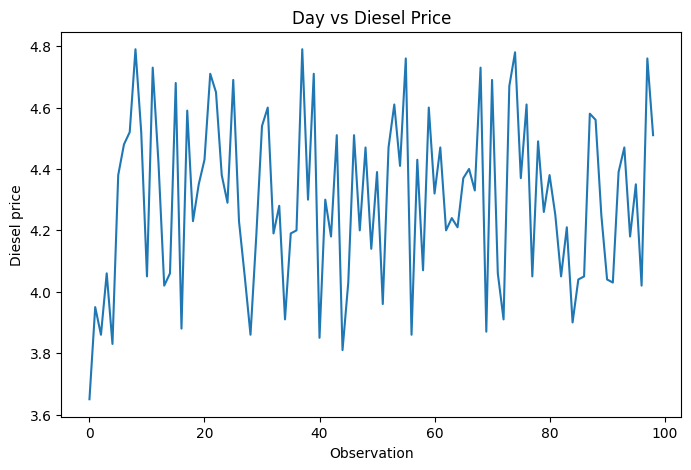

In [5]:
print("##################################")
print("Line Pollting the Diesel price")
print("##################################")
plt.figure(figsize=(8,5))
plt.plot(df_diesel_price["Diesel_price"])
plt.xlabel('Observation')
plt.ylabel('Diesel price')
plt.title('Day vs Diesel Price')

###########################
Box Pollt the Diesel price
###########################


Text(0.5, 1.0, 'Day vs Diesel Price')

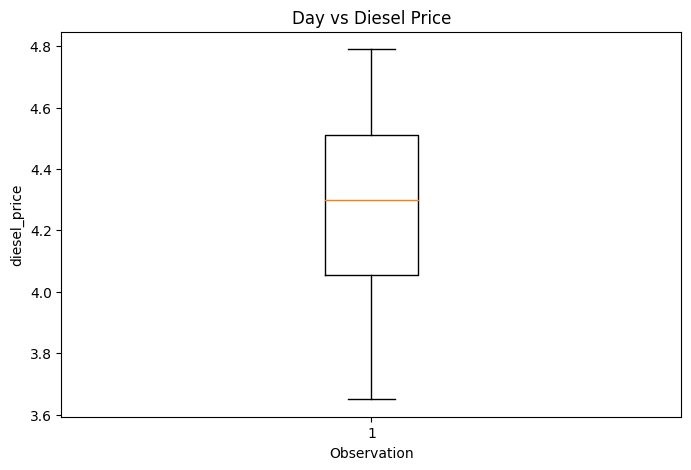

In [6]:
print("###########################")
print("Box Pollt the Diesel price")
print("###########################")
plt.figure(figsize=(8,5))
plt.boxplot(df_diesel_price["Diesel_price"])
plt.xlabel('Observation')
plt.ylabel('diesel_price')
plt.title('Day vs Diesel Price')

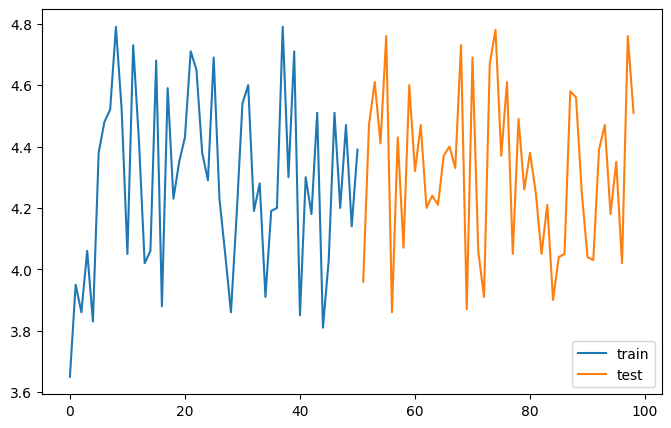

In [7]:
df1 = df_diesel_price["Diesel_price"]
train = df1.loc[:50]
test = df1.loc[51:]
plt.figure(figsize=(8,5))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [8]:
df_diesel_price_np = df_diesel_price.transpose()
shape = df_diesel_price_np.shape
#df_diesel_price_np = df_diesel_price_np.reshape((shape[0] * shape[1], 1))

In [50]:
print("##################################")
print("         Split the dataset        ")
print("##################################")
X_train, X_test, Y_train, Y_test = train_test_split(df_diesel_price["Diesel_price"],df_diesel_price["Diesel_price"], test_size=0.5, random_state=0)
print("Train Dataset Shape ", X_train.shape)
print('Test Dateset  Shape', X_test.shape)
X_train.head()

##################################
         Split the dataset        
##################################
Train Dataset Shape  (49,)
Test Dateset  Shape (50,)


90    4.04
59    4.60
0     3.65
34    3.91
28    3.86
Name: Diesel_price, dtype: float64

In [10]:
print("##################################")
print("        Diesel Dataset Split      ")
print("##################################")
train_ds = df_diesel_price["Diesel_price"].iloc[0:49].values
test_ds = df_diesel_price["Diesel_price"].iloc[49:99].values

##################################
        Diesel Dataset Split      
##################################


In [51]:
print("##################################")
print("        Diesel train dataset      ")
print("##################################")
X_train

##################################
        Diesel train dataset      
##################################


90    4.04
59    4.60
0     3.65
34    3.91
28    3.86
50    4.39
11    4.73
35    4.19
23    4.38
52    4.47
10    4.05
31    4.60
66    4.40
57    4.43
79    4.26
85    4.04
32    4.19
84    3.90
14    4.06
88    4.56
19    4.35
29    4.18
49    4.14
96    4.02
97    4.76
69    3.87
20    4.43
93    4.47
72    3.91
77    4.05
25    4.69
37    4.79
81    4.25
46    4.51
39    4.71
65    4.37
58    4.07
12    4.42
70    4.69
87    4.58
36    4.20
21    4.71
83    4.21
9     4.52
95    4.35
67    4.33
64    4.21
47    4.20
44    3.81
Name: Diesel_price, dtype: float64

In [12]:
print("##################################")
print("        Diesel test dataset      ")
print("##################################")
test_ds

##################################
        Diesel test dataset      
##################################


array([4.14, 4.39, 3.96, 4.47, 4.61, 4.41, 4.76, 3.86, 4.43, 4.07, 4.6 ,
       4.32, 4.47, 4.2 , 4.24, 4.21, 4.37, 4.4 , 4.33, 4.73, 3.87, 4.69,
       4.06, 3.91, 4.67, 4.78, 4.37, 4.61, 4.05, 4.49, 4.26, 4.38, 4.25,
       4.05, 4.21, 3.9 , 4.04, 4.05, 4.58, 4.56, 4.25, 4.04, 4.03, 4.39,
       4.47, 4.18, 4.35, 4.02, 4.76, 4.51])

In [13]:
print("########################################################################")
print("        For Model build X_train,Y_train,X_test and Y_test               ")
print("########################################################################")
X_train = train_ds[:-1]
y_train = train_ds[1:]
X_test = test_ds[:-1]
y_test = test_ds[1:]

########################################################################
        For Model build X_train,Y_train,X_test and Y_test               
########################################################################


In [14]:
print("X_train")
X_train

X_train


array([3.65, 3.95, 3.86, 4.06, 3.83, 4.38, 4.48, 4.52, 4.79, 4.52, 4.05,
       4.73, 4.42, 4.02, 4.06, 4.68, 3.88, 4.59, 4.23, 4.35, 4.43, 4.71,
       4.65, 4.38, 4.29, 4.69, 4.23, 4.05, 3.86, 4.18, 4.54, 4.6 , 4.19,
       4.28, 3.91, 4.19, 4.2 , 4.79, 4.3 , 4.71, 3.85, 4.3 , 4.18, 4.51,
       3.81, 4.03, 4.51, 4.2 ])

In [30]:
print("Y_train")
y_train

Y_train


array([3.95, 3.86, 4.06, 3.83, 4.38, 4.48, 4.52, 4.79, 4.52, 4.05, 4.73,
       4.42, 4.02, 4.06, 4.68, 3.88, 4.59, 4.23, 4.35, 4.43, 4.71, 4.65,
       4.38, 4.29, 4.69, 4.23, 4.05, 3.86, 4.18, 4.54, 4.6 , 4.19, 4.28,
       3.91, 4.19, 4.2 , 4.79, 4.3 , 4.71, 3.85, 4.3 , 4.18, 4.51, 3.81,
       4.03, 4.51, 4.2 , 4.47])

In [15]:
print("X_test")
X_test

X_test


array([4.14, 4.39, 3.96, 4.47, 4.61, 4.41, 4.76, 3.86, 4.43, 4.07, 4.6 ,
       4.32, 4.47, 4.2 , 4.24, 4.21, 4.37, 4.4 , 4.33, 4.73, 3.87, 4.69,
       4.06, 3.91, 4.67, 4.78, 4.37, 4.61, 4.05, 4.49, 4.26, 4.38, 4.25,
       4.05, 4.21, 3.9 , 4.04, 4.05, 4.58, 4.56, 4.25, 4.04, 4.03, 4.39,
       4.47, 4.18, 4.35, 4.02, 4.76])

In [16]:
print("Y_test")
y_test

Y_test


array([4.39, 3.96, 4.47, 4.61, 4.41, 4.76, 3.86, 4.43, 4.07, 4.6 , 4.32,
       4.47, 4.2 , 4.24, 4.21, 4.37, 4.4 , 4.33, 4.73, 3.87, 4.69, 4.06,
       3.91, 4.67, 4.78, 4.37, 4.61, 4.05, 4.49, 4.26, 4.38, 4.25, 4.05,
       4.21, 3.9 , 4.04, 4.05, 4.58, 4.56, 4.25, 4.04, 4.03, 4.39, 4.47,
       4.18, 4.35, 4.02, 4.76, 4.51])

In [52]:
print("##########################################################")
print("        Shaping the Dataset for model building            ")
print("##########################################################")
X_train_series = X_train.values.reshape((X_train.shape[0], 1))
X_test_series = X_test.values.reshape((X_test.shape[0], 1))

##########################################################
        Shaping the Dataset for model building            
##########################################################


In [60]:
print("##########################################################")
print("        Model build using various parameters              ")
print("##########################################################")

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[0],X_train_series.shape[1])))

model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
lr = 0.0003
adam = optimizers.Adam(lr)
model_cnn.compile(loss='mse', optimizer=adam)
model_cnn.summary()

##########################################################
        Model build using various parameters              
##########################################################
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 48, 64)            192       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 24, 64)           0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1536)              0         
                                                                 
 dense_27 (Dense)            (None, 50)                76850     
                                                                 
 dense_28 (Dense)            (None, 1)                 51        
        

In [54]:
print("##########################################################")
print("        Model compile              ")
print("##########################################################")
model_cnn.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),  metrics=["mae"])

In [41]:
model_cnn

In [62]:
print("################################")
print("        Model fit              ")
print("###############################")
model_cnn = tf.keras.Sequential([tf.keras.layers.Dense(100),tf.keras.layers.Dense(10),tf.keras.layers.Dense(1)])
model_cnn.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])
model_cnn.fit(X_train, Y_train, epochs=100)

################################
        Model fit              
###############################
Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 4.0077 - mae: 4.0077
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 3.5000 - mae: 3.5000
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 2.9875 - mae: 2.9875
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 2.4793 - mae: 2.4793
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 1.9655 - mae: 1.9655
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 1.4470 - mae: 1.4470
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 0.9223 - mae: 0.9223
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 0.3900 - mae: 0.3900
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 0.1297 - mae: 0.1297
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 0.4

In [47]:
cnn_history = model_cnn.fit(X_train_series, Y_train, epochs=40, verbose=2)
#cnn_history = model_cnn.fit(X_train_series, Y_train, validation_data=(X_test_series, Y_test), epochs=40, verbose=2)
#cnn_history =model_cnn.fit(X_train_series.shape[0], X_train_series.shape[0], epochs=100, verbose=0)
#Y_train, Y_test
#cnn_history = model_cnn.fit(X_train_series, Y_train, validation_data=(X_train_series, Y_train), epochs=epochs, verbose=2)

Epoch 1/40
2/2 - 0s - loss: 0.0103 - mae: 0.0103 - 8ms/epoch - 4ms/step
Epoch 2/40
2/2 - 0s - loss: 0.0093 - mae: 0.0093 - 6ms/epoch - 3ms/step
Epoch 3/40
2/2 - 0s - loss: 0.0101 - mae: 0.0101 - 7ms/epoch - 3ms/step
Epoch 4/40
2/2 - 0s - loss: 0.0092 - mae: 0.0092 - 6ms/epoch - 3ms/step
Epoch 5/40
2/2 - 0s - loss: 0.0112 - mae: 0.0112 - 6ms/epoch - 3ms/step
Epoch 6/40
2/2 - 0s - loss: 0.0085 - mae: 0.0085 - 6ms/epoch - 3ms/step
Epoch 7/40
2/2 - 0s - loss: 0.0068 - mae: 0.0068 - 8ms/epoch - 4ms/step
Epoch 8/40
2/2 - 0s - loss: 0.0086 - mae: 0.0086 - 6ms/epoch - 3ms/step
Epoch 9/40
2/2 - 0s - loss: 0.0101 - mae: 0.0101 - 6ms/epoch - 3ms/step
Epoch 10/40
2/2 - 0s - loss: 0.0069 - mae: 0.0069 - 7ms/epoch - 3ms/step
Epoch 11/40
2/2 - 0s - loss: 0.0079 - mae: 0.0079 - 6ms/epoch - 3ms/step
Epoch 12/40
2/2 - 0s - loss: 0.0153 - mae: 0.0153 - 10ms/epoch - 5ms/step
Epoch 13/40
2/2 - 0s - loss: 0.0245 - mae: 0.0245 - 8ms/epoch - 4ms/step
Epoch 14/40
2/2 - 0s - loss: 0.0110 - mae: 0.0110 - 7ms/epo

In [57]:
print("#######################################")
print("        Model prediction               ")
print("#######################################")
y_pred = model_cnn.predict(X_test, verbose=0)
print(y_pred)

#######################################
        Model prediction               
#######################################
[[4.2193966]
 [4.047749 ]
 [3.8665652]
 [4.724805 ]
 [4.352901 ]
 [4.3719726]
 [3.8856373]
 [4.638981 ]
 [4.3910446]
 [4.171717 ]
 [4.5817647]
 [4.0286775]
 [4.467333 ]
 [4.019141 ]
 [4.49594  ]
 [4.515013 ]
 [4.6199093]
 [4.2766128]
 [4.2670774]
 [4.7534127]
 [4.486405 ]
 [4.190789 ]
 [4.0572853]
 [4.0572853]
 [4.0286775]
 [4.448261 ]
 [4.457797 ]
 [4.486405 ]
 [4.047749 ]
 [4.5817647]
 [4.305221 ]
 [4.3624377]
 [4.238468 ]
 [4.6961975]
 [3.9619255]
 [4.047749 ]
 [4.2193966]
 [3.8665652]
 [4.228933 ]
 [4.7438765]
 [3.9523895]
 [4.448261 ]
 [4.171717 ]
 [4.2861495]
 [3.8379574]
 [4.648516 ]
 [4.562693 ]
 [3.8570292]
 [4.2861495]
 [4.3624377]]


In [69]:
print("##############################")
print("    Model Evaluation          ")
print("##############################")
model_cnn.evaluate(X_test, Y_test)
model_evaluation_cnn = model_cnn.evaluate(X_test, Y_test, verbose=1)
print('CNN Model Test accuracy:', model_evaluation_cnn[1])

##############################
    Model Evaluation          
##############################
2/2 [==============================] - 0s 8ms/step - loss: 0.0167 - mae: 0.0167
CNN Model Test accuracy: 0.016665244475007057
